In [63]:
"""Script to run the analysis with all the parameters

Authors: Joe Kirsh, Casey Emmons, Andrew Mehrmann
"""

from RETF.portfolio.index import portfolio_constructor
import matplotlib.pyplot as plt
from zipline import run_algorithm
from zipline.api import order_target_percent, record, set_benchmark
import pytz
from datetime import datetime
from zipline.data.bundles import ingest
from zipline.errors import SymbolNotFound, CannotOrderDelistedAsset


# parameters...these should be in a config file
subr = 'wallstreetbets'
cp = 'RETF/credentials.txt'
start_date = '2017-06-15'
end_date = '2017-11-15'
lookback = 20
cutoff = 0.02
capital_base = 100000


def str_to_dt(s):
    ts = datetime.strptime(s, '%Y-%m-%d')
    return datetime(ts.year, ts.month, ts.day, 0, 0, 0, 0, pytz.utc)

In [68]:
ingest('quantopian-quandl')

def initialize(context):
    context.pc = portfolio_constructor(subr, cp, cutoff=cutoff)
    context.lookback = lookback
    context.universe = {}
    # hack to get around spy bug
    set_benchmark(symbol('AAPL'))    

def handle_data(context, data):
    weights = context.pc.get_portfolio(context.datetime, context.lookback)
    context.universe.update(weights.to_dict())
    for i, j in context.universe.items():
        if i not in weights.index:
            context.universe[i] = 0
    
    for t, pct in context.universe.items():
        try:
            s = symbol(t)
            order_target_percent(s, pct)
            
        except SymbolNotFound:
            print("couldn't find symbol {0}, holding {1} in cash".format(t, round(pct, 3)))
            
        except CannotOrderDelistedAsset:
            print("couldn't order delisted symbol {0}".format(t))
            
        finally:
            pass
            
    # print(context.universe)
    # print(context.datetime)
    # print('')
    # print(weights)
    # print('')
    # print(context.portfolio.positions)
    # print('')


In [69]:
d = run_algorithm(start = str_to_dt(start_date), 
                  end = str_to_dt(end_date), 
                  initialize=initialize,
                  capital_base=capital_base, 
                  handle_data=handle_data,
                  #before_trading_start=before_trading_start,
                  bundle = 'quantopian-quandl',
                  data_frequency='daily')

collecting submissions for 2017-05-26
collecting submissions for 2017-05-27
collecting submissions for 2017-05-28
collecting submissions for 2017-05-29
collecting submissions for 2017-05-30
collecting submissions for 2017-05-31
collecting submissions for 2017-06-01
collecting submissions for 2017-06-02
collecting submissions for 2017-06-03
collecting submissions for 2017-06-04
collecting submissions for 2017-06-05
collecting submissions for 2017-06-06
collecting submissions for 2017-06-07
collecting submissions for 2017-06-08
collecting submissions for 2017-06-09
collecting submissions for 2017-06-10
collecting submissions for 2017-06-11
collecting submissions for 2017-06-12
collecting submissions for 2017-06-13
collecting submissions for 2017-06-14


/home/andrew/gitrepos/wsb/RETF/portfolio/index.py:112: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,adjust=True,ignore_na=False,span=19).mean()
  sdf = pd.ewma(tdf, span=len(tdf) - 1)


couldn't find symbol SHOP, holding 0.093 in cash
collecting submissions for 2017-06-15


/home/andrew/gitrepos/wsb/RETF/portfolio/index.py:112: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,adjust=True,ignore_na=False,span=18).mean()
  sdf = pd.ewma(tdf, span=len(tdf) - 1)


couldn't find symbol SHOP, holding 0.059 in cash
couldn't find symbol SNAP, holding 0.043 in cash
collecting submissions for 2017-06-16
collecting submissions for 2017-06-17
collecting submissions for 2017-06-18
couldn't find symbol MOMO, holding 0.152 in cash
couldn't find symbol SHOP, holding 0.038 in cash
couldn't find symbol SNAP, holding 0.151 in cash
collecting submissions for 2017-06-19
couldn't find symbol MOMO, holding 0 in cash
couldn't find symbol SHOP, holding 0.036 in cash
couldn't find symbol SNAP, holding 0.142 in cash
collecting submissions for 2017-06-20
couldn't find symbol SHOP, holding 0.032 in cash
couldn't find symbol SNAP, holding 0.163 in cash
couldn't find symbol MOMO, holding 0 in cash
collecting submissions for 2017-06-21
couldn't find symbol SHOP, holding 0.028 in cash
couldn't find symbol SNAP, holding 0.118 in cash
couldn't find symbol MOMO, holding 0 in cash
collecting submissions for 2017-06-22
couldn't find symbol SHOP, holding 0 in cash
couldn't find s

/home/andrew/gitrepos/wsb/RETF/portfolio/index.py:112: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,adjust=True,ignore_na=False,span=20).mean()
  sdf = pd.ewma(tdf, span=len(tdf) - 1)


couldn't find symbol SHOP, holding 0 in cash
couldn't find symbol SNAP, holding 0.132 in cash
couldn't find symbol MOMO, holding 0 in cash
couldn't find symbol MLP, holding 0.037 in cash
collecting submissions for 2017-06-26
couldn't find symbol SHOP, holding 0 in cash
couldn't find symbol SNAP, holding 0.084 in cash
couldn't find symbol MOMO, holding 0 in cash
couldn't find symbol MLP, holding 0.033 in cash
collecting submissions for 2017-06-27
couldn't find symbol SHOP, holding 0 in cash
couldn't find symbol SNAP, holding 0.077 in cash
couldn't find symbol MOMO, holding 0 in cash
couldn't find symbol MLP, holding 0.029 in cash
collecting submissions for 2017-06-28
couldn't find symbol SHOP, holding 0 in cash
couldn't find symbol SNAP, holding 0.065 in cash
couldn't find symbol MOMO, holding 0 in cash
couldn't find symbol MLP, holding 0.026 in cash
collecting submissions for 2017-06-29
couldn't find symbol SHOP, holding 0 in cash
couldn't find symbol SNAP, holding 0.064 in cash
couldn

NameError: name 'CannotOrderDelistedAsset' is not defined

In [57]:
d

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-06-15 20:00:00+00:00,NaN,0.000000,NaN,-0.005993,NaN,NaN,0.000000,100000.000000,0.00,0.00,...,0,0,0,NaN,100000.000000,0.00,0.00,1,[],0.0216
2017-06-16 20:00:00+00:00,0.010991,-0.000979,0.184719,-0.019909,0.089869,0.122303,-90207.768369,9792.231631,90109.85,90109.85,...,0,0,0,-11.224972,100000.000000,0.00,0.00,2,"[{'amount': 375, 'price': 10.740000142007165, ...",0.0216
2017-06-19 20:00:00+00:00,0.480857,0.050939,3.327803,0.008129,0.359474,1.320252,513.374982,10305.606613,94788.32,94788.32,...,0,0,0,477.267424,9792.231631,90109.85,90109.85,3,"[{'amount': -33, 'price': 10.509999998859303, ...",0.0219
2017-06-20 20:00:00+00:00,0.446988,0.040512,2.629359,-0.001033,0.308479,1.408366,24997.439891,35303.046504,68748.18,68748.18,...,0,0,0,32.695882,10305.606613,94788.32,94788.32,4,"[{'amount': -342, 'price': 9.869999741820173, ...",0.0216
2017-06-21 20:00:00+00:00,0.391574,0.042548,1.800390,0.004891,0.270580,1.338282,-15806.112016,19496.934488,84757.84,84757.84,...,0,0,0,30.637076,35303.046504,68748.18,68748.18,5,"[{'amount': -52, 'price': 57.43999970255484, '...",0.0216
2017-06-22 20:00:00+00:00,0.361175,0.037327,1.379360,0.003238,0.242663,1.357705,2345.414357,21842.348845,81890.32,81890.32,...,0,0,0,22.082893,19496.934488,84757.84,84757.84,6,"[{'amount': 174, 'price': 57.94000366402589, '...",0.0215
2017-06-23 20:00:00+00:00,0.332000,0.037164,0.947129,0.008198,0.223024,1.319211,-6634.232545,15208.116300,88508.24,88508.24,...,0,0,0,20.358194,21842.348845,81890.32,81890.32,7,"[{'amount': -106, 'price': 58.66999969396771, ...",0.0215


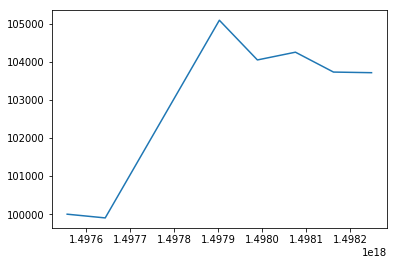

In [62]:
%matplotlib inline
plt.plot(d.ending_cash + d.ending_exposure)